In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
models = [
    np.load(
        f"saved/{model}_parameter.npy",
    )
    for model in ["gpmodel", "gpmodel_periodic", "gpmodel_rbf"]
]
ground_truth = [0.1, 0.1, 0.3]

In [4]:
dfs = []
names = ["Learned", "RBF", "Periodic"]
for model, name in zip(models, names):
    df = pd.DataFrame(np.exp(model), columns=["radius ratio", "$u_1$", "$u_2$"])
    df["Kernel"] = name
    dfs.append(df)
df = pd.concat(dfs)

In [24]:
df[df["Kernel"] == "RBF"].describe()

,radius ratio,$u_1$,$u_2$
count,4000.000000,4000.000000,4000.000000
mean,0.104725,0.179019,0.281466
std,0.007083,0.144311,0.213834
min,0.078099,0.000164,0.000053
25%,0.100216,0.065743,0.106398
50%,0.105055,0.144262,0.230745
75%,0.109550,0.255619,0.415050
max,0.125619,0.907106,0.997288


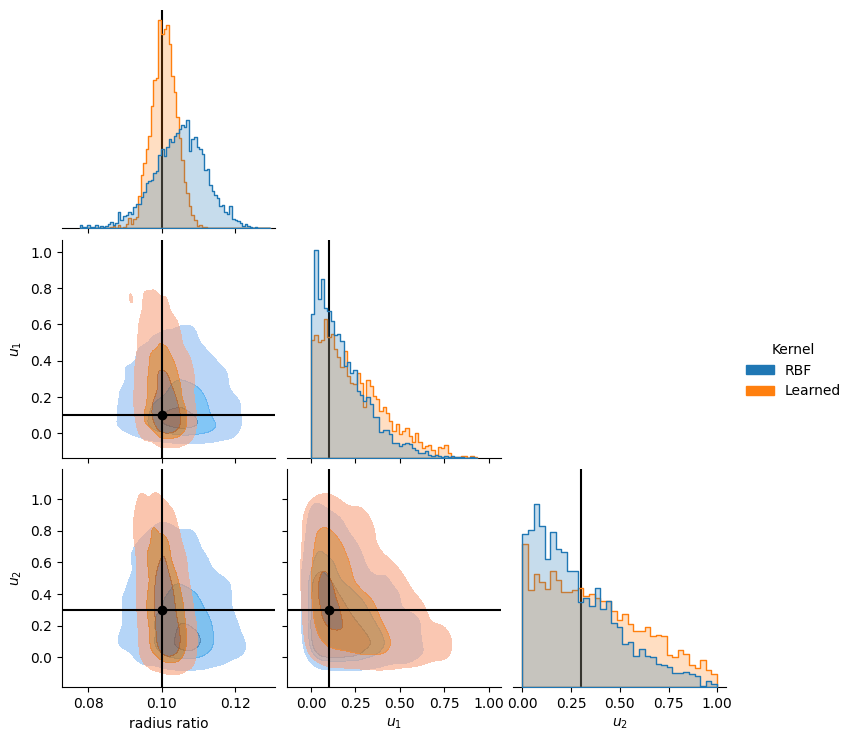

In [73]:
plot = sns.pairplot(
    df,
    corner=True,
    hue="Kernel",
    hue_order=["RBF", "Learned"],
    diag_kind="hist",
    kind="kde",
    diag_kws={"element": "step"},
    plot_kws={"fill": True, "alpha": 0.6, "levels": 4},
)

# Iterate over the axes
for i in range(3):
    for j in range(3):
        if plot.axes[i, j]:
            plot.axes[i, j].axvline(ground_truth[j], color="k")
            if i != j:
                plot.axes[i, j].scatter(ground_truth[j], ground_truth[i], color="k")
                plot.axes[i, j].axhline(ground_truth[i], color="k")

plt.savefig("figures/corner_simple.pdf")
plt.show()